# Import dataset
mixture.example <- read.table(file = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/mixtureexample.csv", header= TRUE, sep = ",");

mixture.example <- read.table(file = "C:/myajun/Teaching/7406/data/mixtureexample.csv", header= TRUE, sep = ",");


In [15]:
## read the data from given URL
url = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/mixtureexample.csv"
data_online= pd.read_csv(url)
data_online.head()

,x1,x2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


In [6]:
## read the data from local address
import pandas as pd
import re   #Regular expression operations
#re.split is very powerful for split strings and values....  re.split(r'(?:,|;|\s)\s*', line),re.split(r'(;|,|\s)\s*', line)  
data_local = pd.read_csv('C:/Users/tianh/Dropbox (GaTech)/7406 Python code/mixtureexample.csv', sep = (r'(?:,|;|\s)\s*'), header =0) #pay attention to the split criteria
data_local.head()

C:\Users\tianh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,x1,x2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


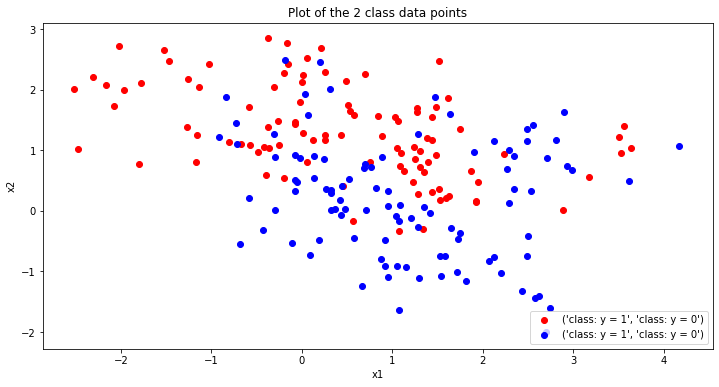

In [72]:
group = ('class: y = 1', 'class: y = 0' )
plt.figure(figsize = (12,6))
plt.scatter(data_local.loc[data_local['y']==1].iloc[:,0], data_local.loc[data_local['y']==1].iloc[:,1], color = 'red', label=group)
plt.scatter(data_local.loc[data_local['y']==0].iloc[:,0], data_local.loc[data_local['y']==0].iloc[:, 1], color = 'blue', label=group)

plt.legend(loc=4)
plt.title('Plot of the 2 class data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Implementing KNN Algorithm with Scikit-Learn
reference: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

## Preprocessing


In [16]:
X = data_local.iloc[:, :-1].values
y = data_local.iloc[:, 2].values

## Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Feature Scaling

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training and Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3) # set k value here
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, execute the following script:

In [30]:
y_pred = classifier.predict(X_test)

## Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17  5]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.77      0.94      0.85        18

    accuracy                           0.85        40
   macro avg       0.86      0.86      0.85        40
weighted avg       0.87      0.85      0.85        40



though the algorithm performed well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

## Comparing Error Rate with the K Value
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [32]:
import numpy as np 
error =[]
#calculating error for K values beween 1 and 40

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values. Execute the following script to create the plot:

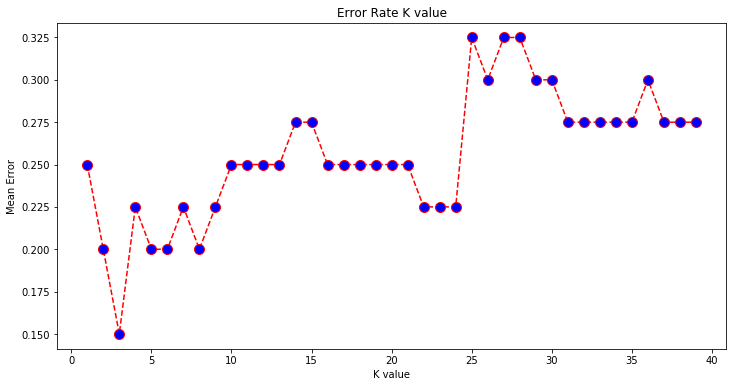

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker ='o',
        markerfacecolor = 'blue', markersize =10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.show()

##  Results : Contour plot

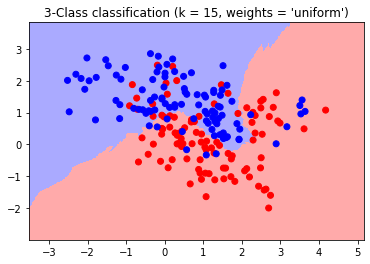

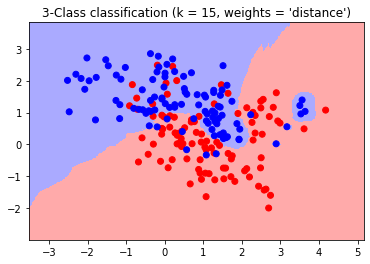

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
# X, y

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

From the output we can see that the mean error is smallest when the value of the K is 3. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.

## Conclusion
KNN is a simple yet powerful classification algorithm. It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm. The KNN algorithm have been widely used to find document similarity and pattern recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps for computer vision, particularly face recognition tasks.

From here, I would advise you to implement the KNN algorithm for a different classification dataset. Vary the test and training size along with the K value to see how your results differ and how can you improve the accuracy of your algorithm. A good collection of classification datasets is available here for you to play with.

# If you wanna do more on KNN: 
# Develop k-Nearest Neighbors in Python From Scratch
# k-Nearest Neighbors (in 3 easy steps)

reference: 
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

This k-Nearest Neighbors tutorial is broken down into 3 parts:

Step 1: Calculate Euclidean Distance.

Step 2: Get Nearest Neighbors.

Step 3: Make Predictions.

These steps will teach you the fundamentals of implementing and applying the k-Nearest Neighbors algorithm for classification and regression predictive modeling problems.

Note: This tutorial assumes that you are using Python 3. If you need help installing Python, see this tutorial:

In [39]:
# Example of making predictions
from math import sqrt
 
#1.  calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
#2.  Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
#3.  Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [57]:
 #4. Test distance function
dataset = list(data_local.values)

prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.
